In [207]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv("./Data/DataFrameParaHacerModelos.csv")
df

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategorizada,AgeCategorizada
0,Spain,Female,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Fair,Adultos
1,France,Female,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Poor,Adultos
2,France,Female,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Good,Adultos
3,Spain,Female,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent,Adultos
4,Spain,Male,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Fair,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,France,Male,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,Very Good,Adultos
9496,France,Male,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Poor,Jovenes-Adultos
9497,France,Female,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,Good,Adultos
9498,Germany,Male,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Very Good,Adultos


## Vamos a eliminar la variable complain

In [3]:
df.drop(columns="Complain",inplace=True)

In [4]:
df

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,CreditScoreCategorizada,AgeCategorizada
0,Spain,Female,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456,Fair,Adultos
1,France,Female,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Poor,Adultos
2,France,Female,1,0.00,2,0,0,93826.63,0,5,GOLD,350,Good,Adultos
3,Spain,Female,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,Excellent,Adultos
4,Spain,Male,8,113755.78,2,1,0,149756.71,1,5,DIAMOND,484,Fair,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,France,Male,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,Very Good,Adultos
9496,France,Male,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,Poor,Jovenes-Adultos
9497,France,Female,7,0.00,1,0,1,42085.58,1,3,SILVER,564,Good,Adultos
9498,Germany,Male,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,Very Good,Adultos


# Ahora vamos a empezar a separar los datos en train y test para modelizar con los datos que tenemos 

In [5]:
variablesx = list(df.columns)
variablesx.remove("Exited")
variablesx


['Geography',
 'Gender',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Satisfaction Score',
 'Card Type',
 'Point Earned',
 'CreditScoreCategorizada',
 'AgeCategorizada']

In [6]:
x = df[variablesx]
y = df["Exited"]
y


0       0
1       1
2       0
3       0
4       1
       ..
9495    0
9496    0
9497    1
9498    1
9499    0
Name: Exited, Length: 9500, dtype: int64

# Categoricas

['Geography',
 'Gender',
 'Card Type',
 'CreditScoreCategorizada',
 'AgeCategorizada',
 'HasCrCard',
 'IsActiveMember',
 'Satisfaction Score']

# Numericas

    - Balance
    - EstimatedSalary  
    - Point Earned
    - Tenure
    - NumOfProducts 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=922)

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
columns_to_encode = ['Geography','Gender','Card Type','CreditScoreCategorizada','AgeCategorizada','HasCrCard','IsActiveMember','Satisfaction Score']
encoded_columns_train = ohe.fit_transform(x_train[columns_to_encode].values)
encoded_columns_test = ohe.transform(x_test[columns_to_encode].values)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_escaler = ["Balance","EstimatedSalary","Point Earned","Tenure","NumOfProducts"]
escaler_columns_train = scaler.fit_transform(x_train[columns_to_escaler].values)
escaler_columns_test = scaler.transform(x_test[columns_to_escaler].values)

In [11]:
print(encoded_columns_test.shape)
encoded_columns_train.shape


(1900, 29)


(7600, 29)

In [12]:
x_train_final = np.concatenate([encoded_columns_train,escaler_columns_train],axis=1)
x_test_final = np.concatenate([encoded_columns_test,escaler_columns_test],axis=1)

In [13]:
print(x_train_final.shape)
x_test_final.shape

(7600, 34)


(1900, 34)

# Regresion Logistica

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 922, max_iter =300)
logreg.fit(x_train_final,y_train)

LogisticRegression(max_iter=300, random_state=922)

In [49]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #
from sklearn.metrics import confusion_matrix 

In [50]:
y_predict = logreg.predict(x_test_final)
logreg_accuracy = accuracy_score(y_test,y_predict)
logreg_accuracy

0.8231578947368421

In [51]:
logreg.predict_proba(x_test_final)

array([[0.80995079, 0.19004921],
       [0.45113797, 0.54886203],
       [0.50745049, 0.49254951],
       ...,
       [0.95527124, 0.04472876],
       [0.88677081, 0.11322919],
       [0.72062816, 0.27937184]])

In [52]:
logreg.predict(x_test_final)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
logreg_AUC = roc_auc_score(y_test,logreg.predict_proba(x_test_final)[:,1])
logreg_AUC

0.7863718789231412

In [54]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1437,61
Se va del Banco,275,127


In [55]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6840796019900498

In [56]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.04072096128170895

Lo peor en mi opinion es la tasa de falsos negativos que el modelo predice que no se va y se va

In [57]:
logreg.coef_[0]

array([-0.29729077,  0.56702994, -0.26927616,  0.2560297 , -0.25556669,
        0.10748972, -0.08923882, -0.00362099, -0.01416689, -0.0587317 ,
       -0.02738256, -0.11463009,  0.09451819,  0.10668917,  0.33740089,
        1.87002523, -0.76848976, -0.65389921,  0.25896428, -1.04353842,
        0.02047361, -0.0200106 ,  0.49664546, -0.49618244,  0.00263231,
        0.12415064, -0.05481899, -0.0390139 , -0.03248704,  0.12000079,
        0.01745321, -0.0443239 , -0.04709017, -0.04871873])

In [58]:
precisiones = dict()
precisiones["RegresionLogistica"]=[logreg_accuracy,logreg_AUC,tfn,tfp]

# El class_weight balanced de la regresion logistica

In [191]:
from sklearn.linear_model import LogisticRegression
logregBalanced = LogisticRegression(random_state = 922, max_iter =300,class_weight="balanced")
logregBalanced.fit(x_train_final,y_train)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=922)

In [192]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #
from sklearn.metrics import confusion_matrix 

In [193]:
y_predict = logregBalanced.predict(x_test_final)
logreg_accuracy = accuracy_score(y_test,y_predict)
logreg_accuracy

0.7373684210526316

In [194]:
logregBalanced.predict_proba(x_test_final)

array([[0.52309138, 0.47690862],
       [0.18996642, 0.81003358],
       [0.21801645, 0.78198355],
       ...,
       [0.83222671, 0.16777329],
       [0.6747853 , 0.3252147 ],
       [0.38275659, 0.61724341]])

In [195]:
logregBalanced.predict(x_test_final)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [196]:
logreg_AUC = roc_auc_score(y_test,logregBalanced.predict_proba(x_test_final)[:,1])
logreg_AUC

0.787590751184

In [197]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1121,377
Se va del Banco,122,280


In [198]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.3034825870646766

In [199]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.25166889185580776

Lo peor en mi opinion es la tasa de falsos negativos que el modelo predice que no se va y se va

In [200]:
logreg.coef_[0]

array([-3.06029213e-01,  5.60650418e-01, -2.55972619e-01,  2.78325618e-01,
       -2.79677032e-01,  1.06854422e-01, -9.46163761e-02,  4.76689180e-03,
       -1.83563521e-02, -7.25405760e-02, -1.73752563e-02, -8.23822755e-02,
        9.01166643e-02,  8.08300295e-02,  4.68626684e-01,  1.91596118e+00,
       -7.02399869e-01, -5.42390710e-01,  2.51588889e-01, -1.39273759e+00,
        2.13381446e-02, -2.26895587e-02,  4.55166803e-01, -4.56518217e-01,
       -5.10744987e-04,  1.11062947e-01, -6.22702387e-02, -3.81895463e-02,
       -1.14438307e-02,  1.38343536e-01,  2.12696757e-02, -4.60307257e-02,
       -3.39144677e-02, -3.94352621e-02])

In [201]:
precisiones["RegresionLogisticaBalanced"]=[logreg_accuracy,logreg_AUC,tfn,tfp]

In [202]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798],
 'GradientBoosting': [0.8542105263157894,
  0.857815395651914,
  0.5398009950248757,
  0.04005340453938585]}

## Arbol de decision 

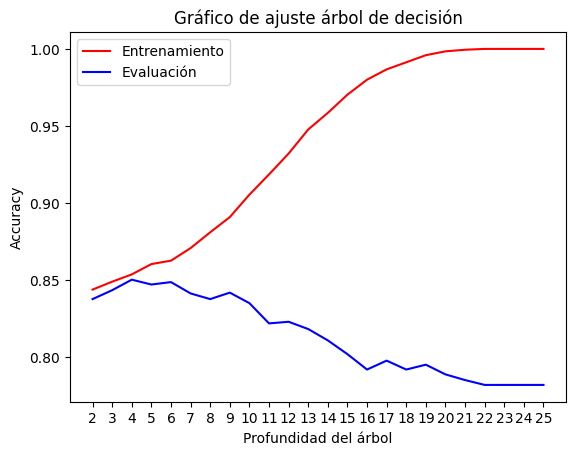

In [71]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
max_depth_list = list(range(2, 26))
for profundidad in max_depth_list:
    modelo = DecisionTreeClassifier(max_depth = profundidad, random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))
    
plt.plot(max_depth_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_depth_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad del árbol')
plt.xticks(range(2,26))
plt.show()

Nos vamos a quedar con una profundidad de 4 arboles 

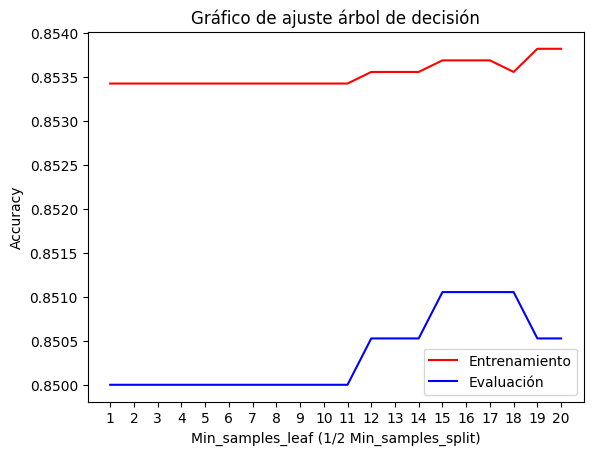

In [72]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
min_samples_list = list(range(1, 21))

for min_sample in min_samples_list:
    modelo = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = min_sample, min_samples_split = 2*min_sample, random_state = 922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(min_samples_list, train_prec, color='r', label='Entrenamiento')
plt.plot(min_samples_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Min_samples_leaf (1/2 Min_samples_split)')
plt.xticks(range(1,21))
plt.show()

Nos quedamos con 15 de min_sample_leaf

In [98]:
treeModel = DecisionTreeClassifier(max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
treeModel.fit(x_train_final, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=30,
                       random_state=922)

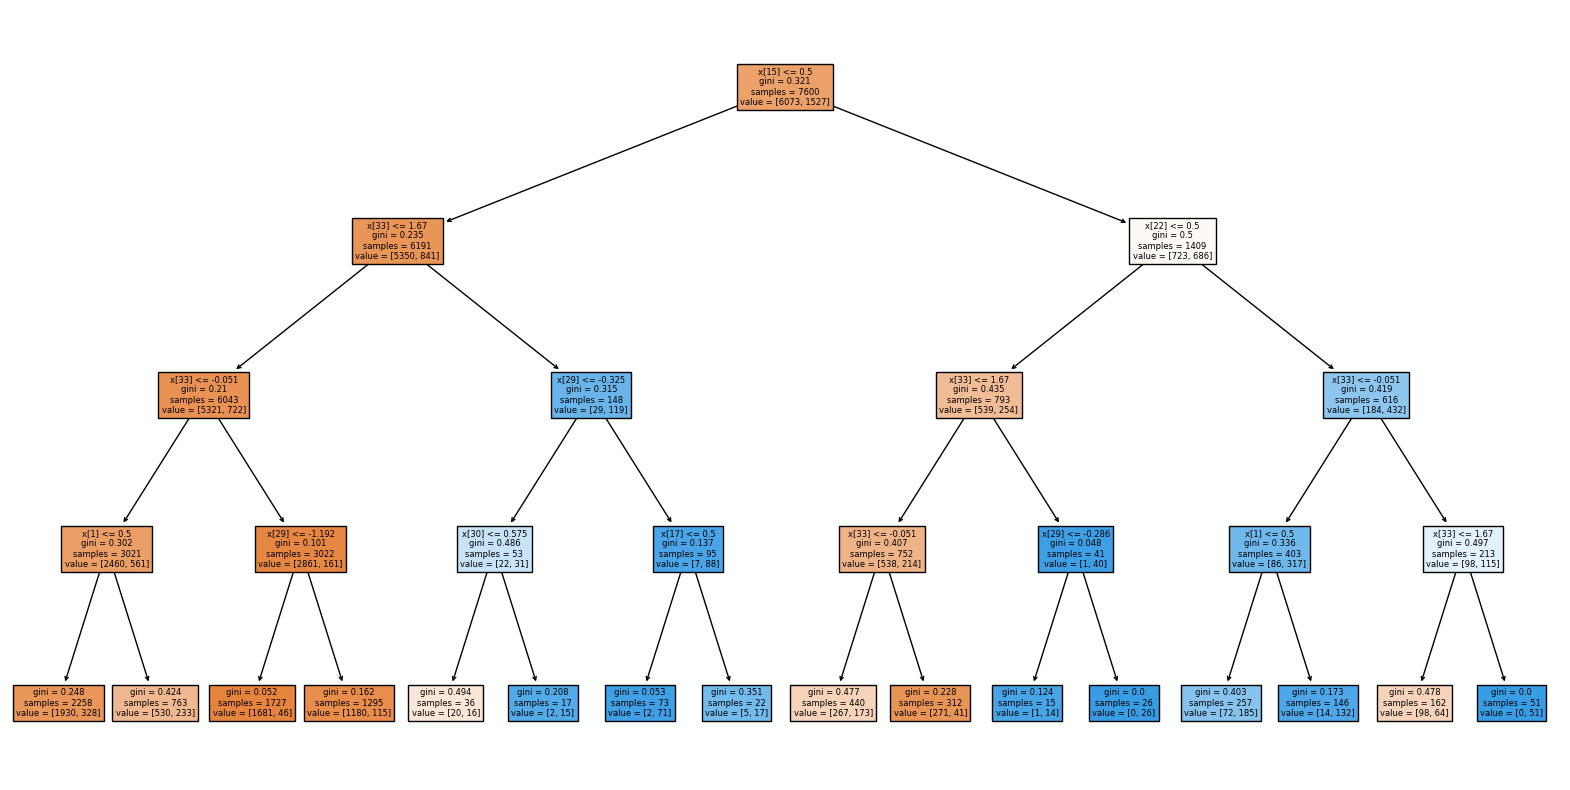

In [99]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(treeModel, filled=True)
plt.show()

In [100]:
treeModel.feature_importances_.tolist()

[0.0,
 0.04841886000947026,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.38511668591014897,
 0.0,
 0.0018390439236713326,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1370361167071341,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.018701384527891992,
 0.006029669106458908,
 0.0,
 0.0,
 0.40285823981522456]

#### Podemos ver como la variable de edad tiene la que mas importancia seguida de el numero de productos que tiene


In [101]:
y_predict = treeModel.predict(x_test_final)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8510526315789474

In [102]:
y_predict_proba = treeModel.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8238555221223656

In [103]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1472,26
Se va del Banco,257,145


In [104]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6393034825870647

In [105]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.017356475300400534

In [106]:
precisiones["Arbol"]=[accuracy,AUC,tfn,tfp]

#### ArbolBalanced Voy ha hacer el modelo pero con el classWeight balanced 

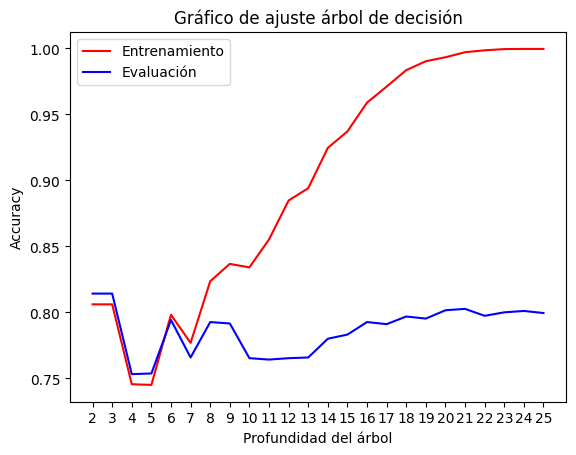

In [136]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
max_depth_list = list(range(2, 26))
for profundidad in max_depth_list:
    modelo = DecisionTreeClassifier(max_depth = profundidad, random_state=922,class_weight="balanced")
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))
    
plt.plot(max_depth_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_depth_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad del árbol')
plt.xticks(range(2,26))
plt.show()

Nos vamos a quedar con una profundidad de 3 arboles 

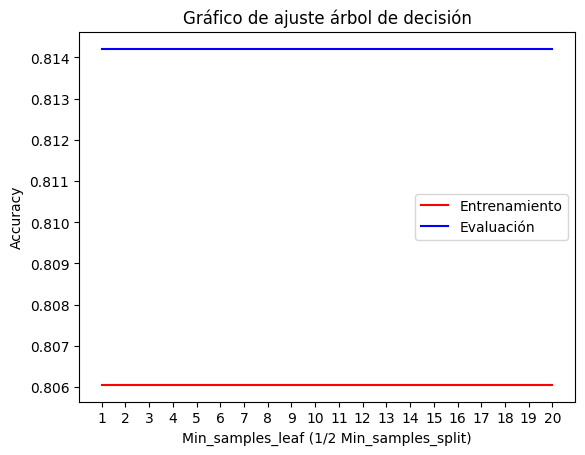

In [137]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
min_samples_list = list(range(1, 21))

for min_sample in min_samples_list:
    modelo = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = min_sample, min_samples_split = 2*min_sample, random_state = 922,class_weight="balanced")
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(min_samples_list, train_prec, color='r', label='Entrenamiento')
plt.plot(min_samples_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Min_samples_leaf (1/2 Min_samples_split)')
plt.xticks(range(1,21))
plt.show()

Nos quedamos con 10 de min_sample_leaf

In [138]:
treeModelBalanced = DecisionTreeClassifier(max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced")
treeModelBalanced.fit(x_train_final, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=922)

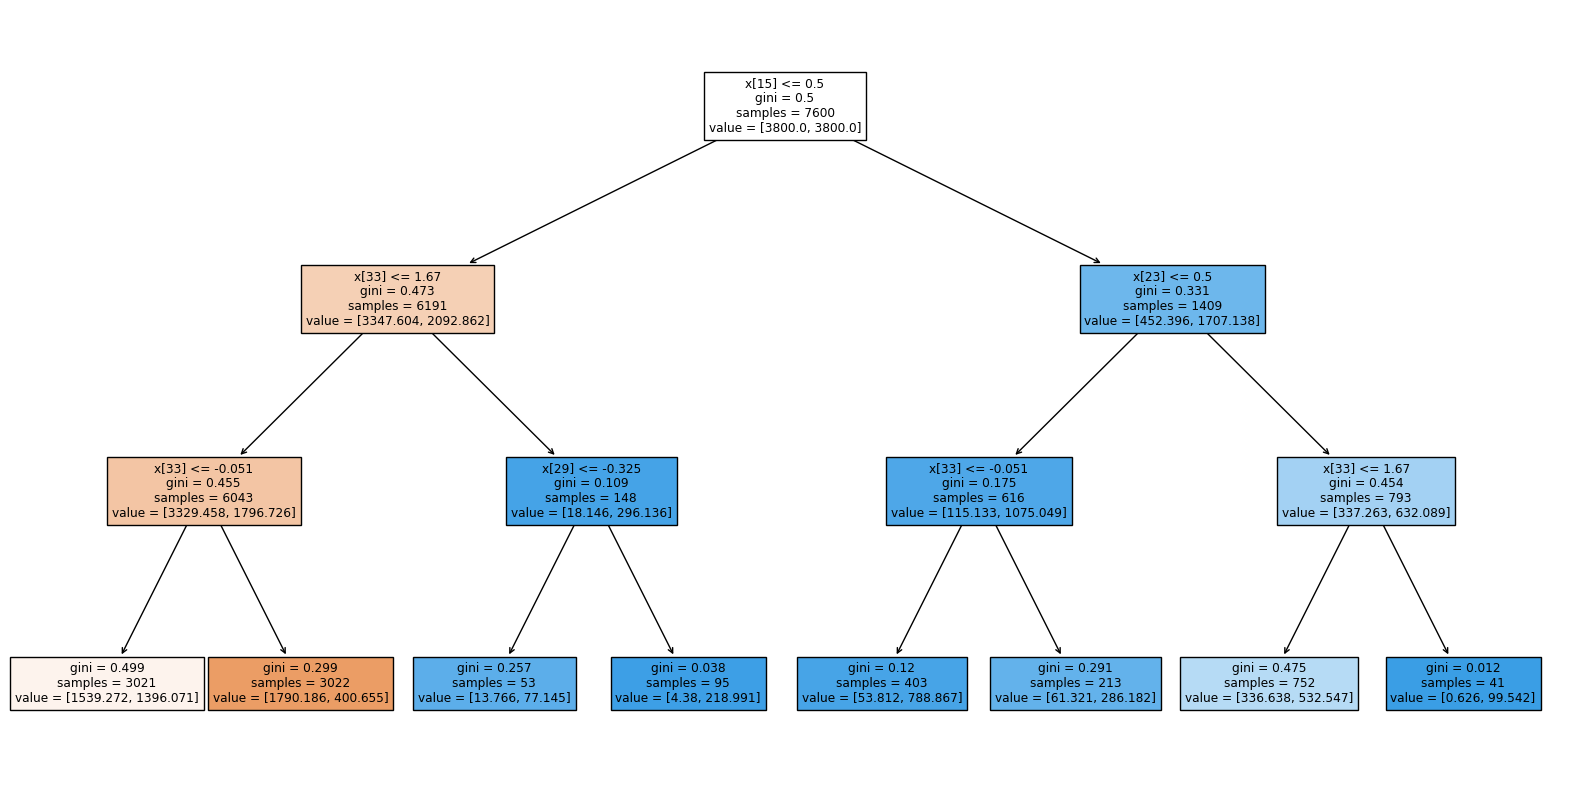

In [139]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(treeModelBalanced, filled=True)
plt.show()

In [140]:
treeModelBalanced.feature_importances_.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.492659472306064,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06522646002966653,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002172300509148198,
 0.0,
 0.0,
 0.0,
 0.4399417671551213]

In [141]:
y_predict = treeModelBalanced.predict(x_test_final)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8142105263157895

In [142]:
y_predict_proba = treeModelBalanced.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.79885618635793

In [143]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1334,164
Se va del Banco,189,213


In [144]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.4701492537313433

In [145]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.10947930574098798

In [146]:
precisiones["ArbolBalanceado"]=[accuracy,AUC,tfn,tfp]

In [147]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898]}

# Random Forest 

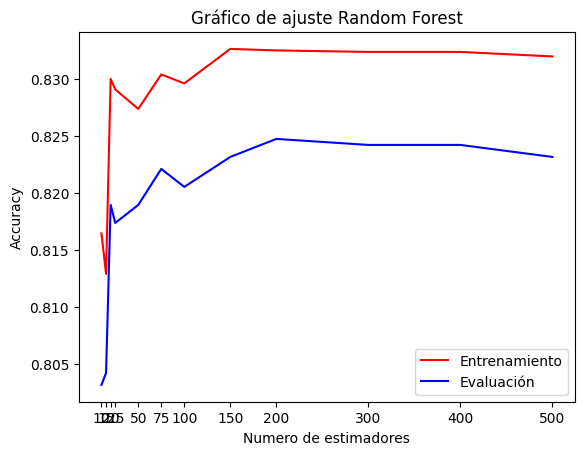

In [148]:
from sklearn.ensemble import RandomForestClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400,500]

for num_estimadores in n_estimadores_list:
    modelo = RandomForestClassifier(n_estimators = num_estimadores, max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Random Forest')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

El numero de estimadores que me voy a quedar es el de 200 

In [128]:
randomForest = RandomForestClassifier(n_estimators = 200, max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
randomForest.fit(x_train_final,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=30,
                       n_estimators=200, random_state=922)

In [129]:
y_predict = randomForest.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8247368421052632

In [130]:
y_predict_proba = randomForest.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8315332549535368

In [131]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1494,4
Se va del Banco,329,73


In [132]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.818407960199005

In [133]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.0026702269692923898

In [134]:
precisiones['RandomForest'] = [accuracy,AUC,tfn,tfp]


In [135]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898]}

# Random Forest Balanced con el class Weight

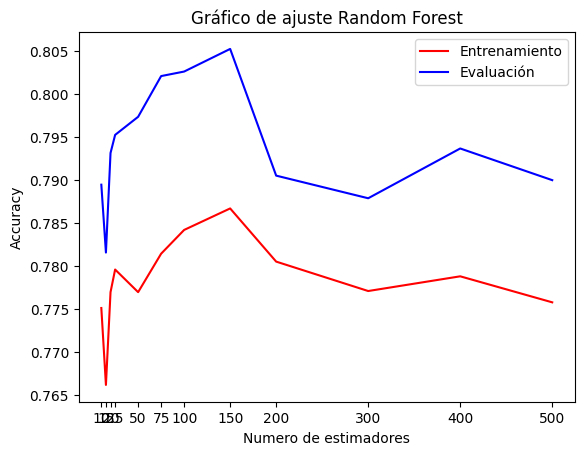

In [149]:
from sklearn.ensemble import RandomForestClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400,500]

for num_estimadores in n_estimadores_list:
    modelo = RandomForestClassifier(n_estimators = num_estimadores, max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced")
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Random Forest')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

El numero de estimadores que me voy a quedar es el de 50 

In [150]:
randomForestBalanced = RandomForestClassifier(n_estimators = 150, max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced")
randomForestBalanced.fit(x_train_final,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=150, random_state=922)

In [151]:
y_predict = randomForestBalanced.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8052631578947368

In [152]:
y_predict_proba = randomForestBalanced.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8301699114573994

In [153]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1247,251
Se va del Banco,119,283


In [154]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.2960199004975124

In [155]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.16755674232309747

In [156]:
precisiones['RandomForestBalanced'] = [accuracy,AUC,tfn,tfp]


In [157]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747]}

# Bagging 

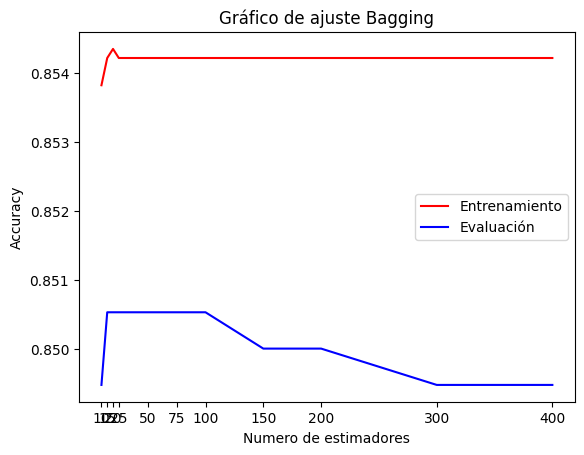

In [158]:
from sklearn.ensemble import BaggingClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400]

for num_estimadores in n_estimadores_list:
    modelo = BaggingClassifier(DecisionTreeClassifier(max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922),n_estimators =num_estimadores,random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Bagging')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

Vamos a quedarnos con 20 estimadores

In [159]:
BAG_model = BaggingClassifier(DecisionTreeClassifier(max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922),n_estimators =20,random_state=922)
BAG_model.fit(x_train_final, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   min_samples_leaf=15,
                                                   min_samples_split=30,
                                                   random_state=922),
                  n_estimators=20, random_state=922)

In [160]:
y_predict = BAG_model.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8505263157894737

In [161]:
y_predict_proba = BAG_model.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8436198513440807

In [162]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1468,30
Se va del Banco,254,148


In [163]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6318407960199005

In [164]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.020026702269692925

In [165]:
precisiones['Bagging'] = [accuracy,AUC,tfn,tfp]

In [166]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925]}

# Bagging Balanced con el class Weight

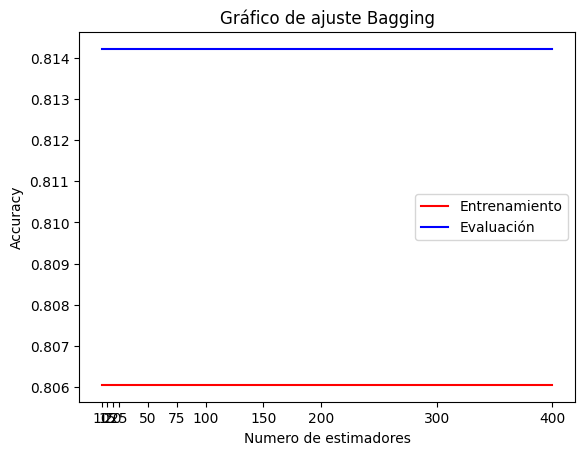

In [167]:
from sklearn.ensemble import BaggingClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400]

for num_estimadores in n_estimadores_list:
    modelo = BaggingClassifier(DecisionTreeClassifier(max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced"),n_estimators =num_estimadores,random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Bagging')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

Vamos a quedarnos con 20 estimadores

In [168]:
BAG_modelBalanced = BaggingClassifier(DecisionTreeClassifier(max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced"),n_estimators =200,random_state=922)
BAG_modelBalanced.fit(x_train_final, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=3,
                                                   min_samples_leaf=10,
                                                   min_samples_split=20,
                                                   random_state=922),
                  n_estimators=200, random_state=922)

In [169]:
y_predict = BAG_modelBalanced.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8142105263157895

In [170]:
y_predict_proba = BAG_modelBalanced.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8265871908813741

In [171]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1334,164
Se va del Banco,189,213


In [172]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.4701492537313433

In [173]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.10947930574098798

In [174]:
precisiones['BaggingBalanced'] = [accuracy,AUC,tfn,tfp]

In [175]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798]}

# Gradient Boosting

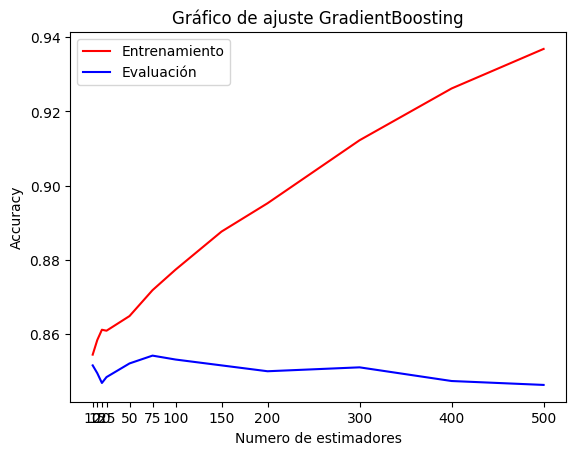

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400,500]

for num_estimadores in n_estimadores_list:
    modelo = GradientBoostingClassifier(n_estimators = num_estimadores, max_depth=4,  min_samples_leaf =15, min_samples_split = 15*2, random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste GradientBoosting')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

In [177]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators = 75, max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
GB_model.fit(x_train_final,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=15,
                           min_samples_split=30, n_estimators=75,
                           random_state=922)

In [178]:
y_predict = GB_model.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8542105263157894

In [179]:
y_predict_proba = GB_model.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.857815395651914

In [180]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1438,60
Se va del Banco,217,185


In [181]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.5398009950248757

In [182]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.04005340453938585

In [183]:
precisiones['GradientBoosting'] = [accuracy,AUC,tfn,tfp]

In [184]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798],
 'GradientBoosting': [0.8542105263157894,
  0.857815395651914,
  0.5398009950248757,
  0.04005340453938585]}

# Elección del mejor modelo

In [203]:
df_precisiones = pd.DataFrame.from_dict(precisiones,orient ='index',columns=['Accuracy','AUC','Falsos negativos','Falsos positivos'])


In [204]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos
RegresionLogistica,0.823158,0.786372,0.684080,0.040721
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669
Arbol,0.851053,0.823856,0.639303,0.017356
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479
RandomForest,0.824737,0.831533,0.818408,0.002670
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557
Bagging,0.850526,0.843620,0.631841,0.020027
BaggingBalanced,0.814211,0.826587,0.470149,0.109479
GradientBoosting,0.854211,0.857815,0.539801,0.040053


puntuacion = 0.3*Accuracy + 0.2*AUC + 0.35(1-Taso Falsos Negativos)+0.15(1-Taso Falsos Positivos)

In [205]:
df_precisiones['puntuacion'] = 0.2*df_precisiones.Accuracy+0.3*df_precisiones.AUC + 0.35*(1-df_precisiones['Falsos negativos'])+0.15*(1-df_precisiones['Falsos positivos']) 


In [206]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos,puntuacion
RegresionLogistica,0.823158,0.786372,0.684080,0.040721,0.655007
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669,0.739782
Arbol,0.851053,0.823856,0.639303,0.017356,0.691007
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479,0.721525
RandomForest,0.824737,0.831533,0.818408,0.002670,0.627564
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557,0.781363
Bagging,0.850526,0.843620,0.631841,0.020027,0.699043
BaggingBalanced,0.814211,0.826587,0.470149,0.109479,0.729844
GradientBoosting,0.854211,0.857815,0.539801,0.040053,0.733248


### El mejor modelo segun la puntuacion es el RandomForestBalanced

# Vamos a empezar con las Redes Neuronales

In [210]:
init = tf.keras.initializers.glorot_uniform(seed=922)
modeloRedes = tf.keras.models.Sequential()

modeloRedes.add(tf.keras.layers.Dense(512,activation="relu",input_shape = (x_train_final.shape[1],),kernel_initializer=init))
modeloRedes.add(tf.keras.layers.Dense(1024, activation="relu",kernel_initializer=init))
modeloRedes.add(tf.keras.layers.Dense(512, activation="relu",kernel_initializer=init))

modeloRedes.add(tf.keras.layers.Dense(1, activation='sigmoid',kernel_initializer=init))

modeloRedes.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)

In [211]:
df["Exited"].value_counts()

0    7571
1    1929
Name: Exited, dtype: int64

In [212]:
peso_0 = df["Exited"].value_counts().values.sum()/df["Exited"].value_counts()[0]
peso_1=df["Exited"].value_counts().values.sum()/df["Exited"].value_counts()[1]

In [229]:
print(peso_0)
peso_1

1.2547880068683133


4.924831518921721

In [213]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('./Modelos/mejorModeloBank.h5', save_best_only=True, monitor='val_accuracy', mode='max')
historybank = modeloRedes.fit(x_train_final, y_train, epochs=120, batch_size=64, validation_data=(x_test_final, y_test), callbacks=[callback,mcp_save], class_weight={0:peso_0,1:peso_1})

Epoch 1/120
119/119 [==============================] - 3s 18ms/step - loss: 1.0525 - accuracy: 0.7387 - val_loss: 0.5561 - val_accuracy: 0.7379
Epoch 2/120
119/119 [==============================] - 2s 18ms/step - loss: 0.9467 - accuracy: 0.7684 - val_loss: 0.4406 - val_accuracy: 0.7784
Epoch 3/120
119/119 [==============================] - 2s 17ms/step - loss: 0.9019 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7579
Epoch 4/120
119/119 [==============================] - 2s 17ms/step - loss: 0.8639 - accuracy: 0.7799 - val_loss: 0.4562 - val_accuracy: 0.7763
Epoch 5/120
119/119 [==============================] - 2s 18ms/step - loss: 0.8170 - accuracy: 0.7899 - val_loss: 0.4455 - val_accuracy: 0.7916
Epoch 6/120
119/119 [==============================] - 2s 18ms/step - loss: 0.7844 - accuracy: 0.8012 - val_loss: 0.4463 - val_accuracy: 0.7858
Epoch 7/120
119/119 [==============================] - 2s 18ms/step - loss: 0.7229 - accuracy: 0.8146 - val_loss: 0.5062 - val_accuracy:

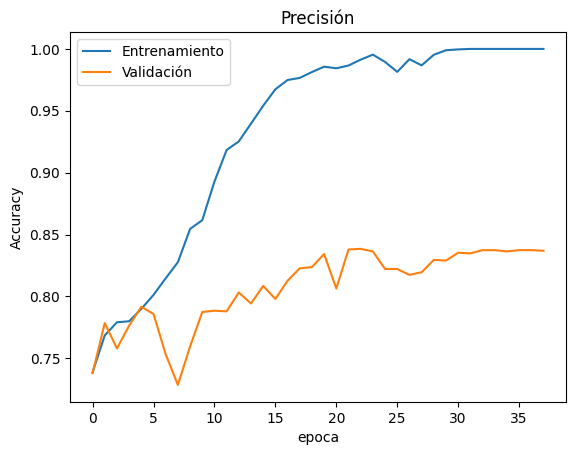

In [214]:
plt.plot(historybank.history['accuracy'])
plt.plot(historybank.history['val_accuracy'])
plt.title('Precisión')
plt.ylabel('Accuracy')
plt.xlabel('epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [215]:
modeloRedesNeuronales1 = tf.keras.models.load_model("./Modelos/mejorModeloBank.h5")

In [216]:
y_predict = modeloRedesNeuronales1.predict(x_test_final)

60/60 [==============================] - 0s 3ms/step


In [217]:
y_predict

array([[1.2343778e-12],
       [7.6663655e-01],
       [7.7725184e-05],
       ...,
       [3.2719305e-09],
       [3.9418240e-04],
       [6.0800448e-02]], dtype=float32)

In [218]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #Para el cálculo del AUC
from sklearn.metrics import confusion_matrix #Para el cálculo de los falsos negativos

In [246]:
y_predictBuena = (y_predict>0.3).astype("int32")

In [247]:
accuracy = accuracy_score(y_test,y_predictBuena)
accuracy

0.8331578947368421

In [248]:
AUC=roc_auc_score(y_test,y_predictBuena)
AUC

0.7367617851995031

In [249]:
matriz_Confusion = confusion_matrix(y_test,y_predictBuena)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1354,144
Se va del Banco,173,229


In [250]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.43034825870646765

In [251]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.09612817089452604

In [252]:
precisiones['RedesNeuronales1'] = [accuracy,AUC,tfn,tfp]

In [253]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798],
 'GradientBoosting': [0.8542105263157894,
  0.857815395651914,
  0.5398009950248757,
  0.04005340453938585],
 'RedesNeuronales1': [0.